<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FitzHugh-Nagumo" data-toc-modified-id="FitzHugh-Nagumo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FitzHugh-Nagumo</a></span></li><li><span><a href="#Arbitrary" data-toc-modified-id="Arbitrary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Arbitrary</a></span></li><li><span><a href="#Hopf" data-toc-modified-id="Hopf-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hopf</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.font_manager import FontProperties
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'Ubuntu'

# colorblind-friendly
COL_V = '#0B7ABA' # V-nullcline color (nearly blue) 
COL_W = '#BD0000' # W-nullcline color (nearly red)
COL_STR = '#A0A0A0' # Streamline color (nearly gray)    
COL_TRAJ = ['k','#FFB700','#84358C'] # Trajectories color 

In [2]:
list_Alph = [chr(i) for i in range(ord('A'),ord('Z')+1)]
font_default = FontProperties()

def plot_nicely(V, W, fun_F, fun_G, fun_ivp, bif_params, param_name, 
                points_init, points_label,
                fig_name):
                    
    ncol = len(bif_params)
    
    mosaic_pattern = ''.join(list_Alph[:ncol])
    mosaic_pattern += '\n'+''.join(list_Alph[ncol:2*ncol])
    
    axs = plt.figure(figsize=(10,5)).subplot_mosaic(mosaic_pattern,
        gridspec_kw={"height_ratios": [1,.3]})

    # phase spaces
    for i, ax in enumerate([axs[idx] for idx in list_Alph[:ncol]]):
        
        F = fun_F(V, W, bif_params[i])
        G = fun_G(V, W, bif_params[i])
        grad = np.sqrt(F**2 + G**2) # grad abs value 

        # streamlines
        ax.streamplot(V, W, F,G, color= COL_STR, 
                      linewidth=0.5+0.2*grad, density=0.75)

        # nullclines
        ax.contour(V, W, F, levels=[0], colors=COL_V, linewidths=3)
        ax.contour(V, W, G, levels=[0], colors=COL_W, linewidths=3)

        
        # trajectories
        for j, point in enumerate(points_label):
            ax.streamplot(V, W, F, G, color= COL_TRAJ[j], 
                          start_points= [points_init[j]],
                          linewidth=1.5+0.2*grad, 
                          integration_direction = 'forward',
                         )
            ax.scatter(*points_init[j], s=8, marker='o', color= COL_TRAJ[j])
            ax.annotate(point, xy= np.array(points_init[j])+0.05, 
                        color=COL_TRAJ[j])

        # just for having a nice legend
        ax.plot([],[], color = COL_V, label='V-null')
        ax.plot([],[], color = COL_W, label='W-null')
        ax.legend(loc='lower right')
        ax.set_xlabel('V')
        ax.set_title(param_name+'='+str(bif_params[i]))
    
    
    # voltage traces
    for i, ax in enumerate([axs[idx] for idx in list_Alph[ncol:2*ncol]]):
        for j, point in enumerate(points_label):
            sols = solve_ivp(fun_ivp, [0, 100], points_init[j], max_step=0.1, 
                             args=[bif_params[i]])
            ax.plot(sols.t, sols.y[0], color=COL_TRAJ[j], linewidth=2-j,
                    label=points_label[j])

        ax.set_xlabel('time')

    # labels
    fig = plt.gcf()
    for label, ax in axs.items():
        # label physical distance to the left and up:
        trans = mtransforms.ScaledTranslation(0/72, 3/72, fig.dpi_scale_trans)
        
        if label not in list_Alph[ncol:2*ncol]:
            font = font_default.copy()
            font.set_weight('bold')
            ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
                    fontsize='xx-large', va='bottom', fontproperties=font)
            
        if label=='A':
            ax.set_ylabel('W')
        elif label ==list_Alph[ncol]:
            ax.set_ylabel('V')
        else:
            ax.set(yticklabels=[])
            
    plt.tight_layout()
    plt.savefig(fig_name+'.jpg',bbox_inches='tight',dpi=300)

# FitzHugh-Nagumo

In [3]:
x = np.arange(-3,3,0.05)
y = np.arange(-1.5,2,0.05)
V,W = np.meshgrid(x,y)

def fun_F(V, W, bif_param): # dV/dt
    return V - V**3/3 - W + bif_param 

def fun_G(V, W, bif_param): # dW/dt
    return 0.08*(V +0.7 - 0.8*W)  

# for plotting the voltage trajectrories
def fun_ivp(t,x,I):
    y = np.zeros_like(x)
    y[0] = x[0]-x[0]**3/3 - x[1] + I
    y[1] = 0.08*(x[0]+0.7 - 0.8*x[1])
    return y

points_init = [[-1,0], [-.5,-1]]
points_label = ['a','b']
bif_params = [0, 0.5]
param_name='$I_{ext}$'
fig_name='Phase_space_FN'

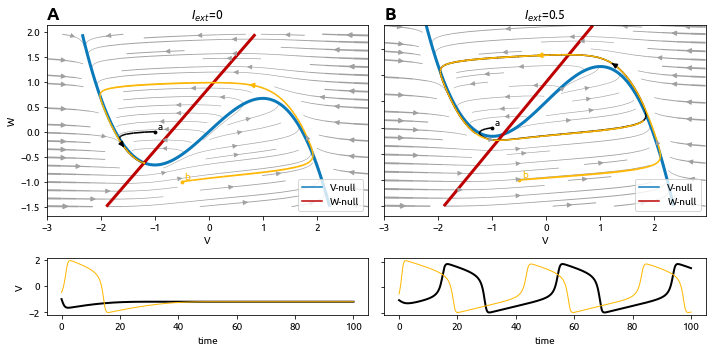

In [4]:
plot_nicely(V, W, fun_F, fun_G, fun_ivp, bif_params, param_name, 
            points_init, points_label, fig_name)

# Arbitrary

In [5]:
x = np.arange(-4,4,0.1)
y = np.arange(-6,6,0.1)
V,W = np.meshgrid(x,y)

F = -0.2*V**3 + 0.1*V**2 +1.5*V - W # dV/dt
G = -0.3*V**2 + 1.8*V - 0.6*W + 1 # dW/dt

def fun_F(V, W, bif_param): # dV/dt
    return -0.2*V**3 + 0.1*V**2 +1.5*V - W + bif_param 

def fun_G(V, W, bif_param): # dW/dt
    return -0.3*V**2 + 1.8*V - 0.6*W + 1 

def fun_ivp(t, x, bif_param):
    y = np.zeros_like(x)
    y[0] = -0.2*x[0]**3 + 0.1*x[0]**2 + 1.5*x[0] - x[1] + bif_param
    y[1] = -0.3*x[0]**2 + 1.8*x[0] - 0.6*x[1] + 1
    return y


points_init = [[-1,0], [-.5,-1], [1,1]]
points_label = ['a','b','c']
bif_params = [-2,-1, 0]
param_name='$I_{ext}$'
fig_name='Phase_space_arb'

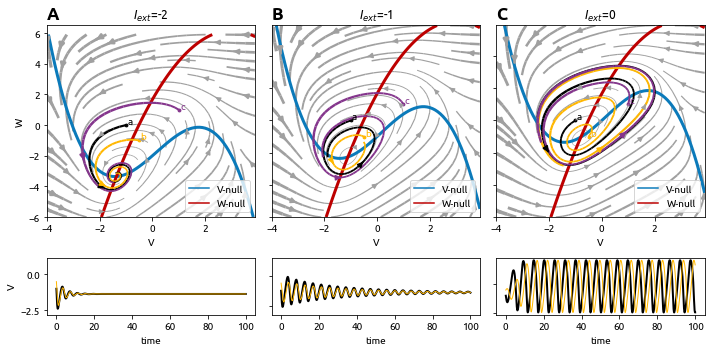

In [6]:
plot_nicely(V, W, fun_F, fun_G, fun_ivp, bif_params, param_name, 
            points_init, points_label, fig_name)

# Hopf

In [7]:
x = np.arange(-2,2,0.1)
y = np.arange(-2,2,0.1)
V,W = np.meshgrid(x,y)

F = -0.2*V**3 + 0.1*V**2 +1.5*V - W # dV/dt
G = -0.3*V**2 + 1.8*V - 0.6*W + 1 # dW/dt

def fun_F(V, W, bif_param): # dV/dt
    return (bif_param-V**2-W**2)*V - W

def fun_G(V, W, bif_param): # dW/dt
    return (bif_param-V**2-W**2)*W + V

def fun_ivp(t, x, bif_param):
    y = np.zeros_like(x)
    y[0] = (bif_param - x[0]**2 - x[1]**2)*x[0] - x[1]
    y[1] = (bif_param - x[0]**2 - x[1]**2)*x[1] + x[0]
    return y

bif_params = [-0.5, 0, 0.5]
points_init = [[-.5,0], [.72,-.72]]
points_label = ['a', 'b']
param_name='$\mu$'
fig_name='Phase_space_Hopf'

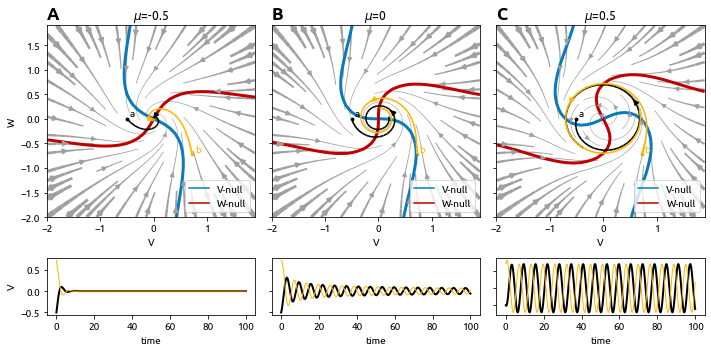

In [8]:
plot_nicely(V, W, fun_F, fun_G, fun_ivp, bif_params, param_name, 
            points_init, points_label, fig_name)